# NBA Playoff Predictor - Andrew Chang, Andrew Chen, Shariq Dharani, Siddarth Satish 

### Project Objective

We wanted to predict if an NBA team will make the playoffs based on current team stats, using data from teams' previous years in the prediction model. To do this we decided on using a combonation of standard team stats (PTS, REB, STLS, FG%, 2P%, 3P%) and advanced metrics (ORtg, DRtg, Pace, TS%, eFG%, Opponent eFG%) from the past 20 seasons (2000 - 2019 seasons). 


### Why 20 Seasons? 

We decided on sticking to the seasons from the 2000s and 2010s as we consider this to be modern basketball (rules, league size, confrences). Particularly during the 2004 Season, when two important changes occured that would have drastict effects on the league. First was the expansion to 30 teams with the addition of the Charlotte Bobcats after the Hornets had been moved to New Orleans. The second change was the removal of hand checking via a rule change, which made defense harder to play and gave more autonomy to the offense. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data

Our data was collected from Basketball-reference.com under team stats by year. We combined data from "Team Per Game Stats" and "Miscellaneous Stats" sections which contained the statistics we wanted to focus on. 

In [2]:
# read in csv
data = pd.read_csv('NBA Team Data 2000 - 2020.csv')

data.head(50)

,Year,Team,G,Win,Loss,MP,FG,FGA,FG%,3P,...,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%,Playoffs
0,2000,Atlanta Hawks,82,28,54,241.8,36.6,83.0,0.441,3.1,...,21.0,94.3,102.0,107.9,-5.9,91.7,0.503,0.460,0.481,N
1,2000,Boston Celtics,82,35,47,240.6,37.2,83.9,0.444,5.1,...,27.1,99.3,104.8,105.6,-0.8,94.6,0.520,0.474,0.498,N
2,2000,Charlotte Hornets,82,49,33,241.2,35.8,79.7,0.449,4.1,...,20.4,98.4,104.3,101.4,2.9,93.9,0.530,0.475,0.478,Y
3,2000,Chicago Bulls,82,17,65,241.5,31.3,75.4,0.415,4.1,...,23.3,84.8,94.2,104.6,-10.4,89.4,0.490,0.443,0.484,N
4,2000,Cleveland Cavaliers,82,32,50,242.1,36.3,82.1,0.442,4.2,...,27.1,97.0,100.4,104.0,-3.6,95.7,0.516,0.468,0.474,N
5,2000,Dallas Mavericks,82,40,42,240.6,39.0,85.9,0.453,6.3,...,21.6,101.4,106.6,107.2,-0.6,94.9,0.532,0.490,0.488,N
6,2000,Denver Nuggets,82,35,47,242.1,37.3,84.3,0.442,5.7,...,23.9,99.0,103.5,105.8,-2.3,94.7,0.517,0.476,0.479,N
7,2000,Detroit Pistons,82,42,40,241.8,37.1,80.9,0.459,5.4,...,24.5,103.5,107.3,105.8,1.5,95.7,0.548,0.492,0.499,Y
8,2000,Golden State Warriors,82,19,63,240.9,36.5,87.1,0.420,4.2,...,24.9,95.5,99.8,108.4,-8.6,95.4,0.484,0.444,0.499,N
9,2000,Houston Rockets,82,34,48,241.8,36.6,81.3,0.450,7.1,...,20.3,99.5,104.8,105.7,-0.9,94.2,0.536,0.494,0.481,N


In [3]:
data.tail(50)

,Year,Team,G,Win,Loss,MP,FG,FGA,FG%,3P,...,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%,Playoffs
575,2019,Houston Rockets,82,53,29,241.8,39.2,87.4,0.449,16.1,...,22.0,113.9,115.5,110.7,4.8,97.9,0.581,0.542,0.525,Y
576,2019,Indiana Pacers,82,48,34,240.3,41.3,87.0,0.475,9.5,...,19.4,108.0,109.9,106.5,3.4,98.1,0.561,0.530,0.516,Y
577,2019,Los Angeles Clippers,82,48,34,241.8,41.3,87.5,0.471,10.0,...,23.3,115.1,112.4,111.5,0.9,101.7,0.575,0.529,0.514,Y
578,2019,Los Angeles Lakers,82,37,45,241.2,42.6,90.5,0.470,10.3,...,20.7,111.8,107.8,109.5,-1.7,103.2,0.554,0.527,0.516,N
579,2019,Memphis Grizzlies,82,33,49,242.4,38.0,84.4,0.450,9.9,...,22.0,103.5,106.1,108.8,-2.7,96.6,0.548,0.508,0.521,N
580,2019,Miami Heat,82,39,43,240.6,39.6,88.0,0.450,11.3,...,20.9,105.7,107.3,107.6,-0.3,98.2,0.542,0.515,0.510,N
581,2019,Milwaukee Bucks,82,60,22,241.2,43.4,91.1,0.476,13.5,...,19.6,118.1,113.8,105.2,8.6,103.3,0.583,0.550,0.503,Y
582,2019,Minnesota Timberwolves,82,36,46,241.8,41.6,91.3,0.456,10.1,...,20.3,112.5,111.4,112.9,-1.5,100.2,0.552,0.511,0.538,N
583,2019,New Orleans Pelicans,82,33,49,240.9,43.7,92.2,0.473,10.3,...,21.1,115.4,111.4,112.6,-1.2,103.3,0.563,0.529,0.532,N
584,2019,New York Knicks,82,17,65,241.2,38.2,88.3,0.433,10.0,...,20.9,104.6,104.5,113.7,-9.2,99.6,0.529,0.490,0.533,N


In [4]:
print(data.shape)

(625, 35)


Here are all the features that are found in our data set. Many of which are considered to be more advanced metrics which take into account many of the raw stats. Ex. True Shooting % (TS%) takes into account a player's field goal percentage (FG%), free throw percentage (FT%), 3-point percentage (3P%) and is supposed to holistically quantify a player's effeciancy when shooting the ball. 

In [5]:
data.columns

Index(['Year', 'Team', 'G', 'Win', 'Loss', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Ortg', 'DRtg', 'NRtg',
       'Pace', 'TS%', 'eFG%', 'OeFG%', 'Playoffs'],
      dtype='object')

Here we seperated the 2020 season from the rest of the data set as we'll later use our prediction model on the 2020 season data. 

##### At the time of the project proposal the NBA season was still ongoing. But due to COVID-19 the season was postponed indefinitely, which meant that instead of having 82 games played for the 2020 season, most teams are hovering in the mid 60s. This effected our final prediction as within both conferences, the lower seeded teams were neck-in-neck and most playoff decisions would be made based on the team performances in the next 20 games or so. We'll address this topic again at the end. 

In [6]:
# split 2020 season where playoffs is NaN
test_data = data.iloc[595:] #2020 Data
data = data.iloc[:595]

In [7]:
teams = data['Team'].unique()
print(teams)

['Atlanta Hawks' 'Boston Celtics' 'Charlotte Hornets' 'Chicago Bulls'
 'Cleveland Cavaliers' 'Dallas Mavericks' 'Denver Nuggets'
 'Detroit Pistons' 'Golden State Warriors' 'Houston Rockets'
 'Indiana Pacers' 'Los Angeles Clippers' 'Los Angeles Lakers' 'Miami Heat'
 'Milwaukee Bucks' 'Minnesota Timberwolves' 'New Jersey Nets'
 'New York Knicks' 'Orlando Magic' 'Philadelphia 76ers' 'Phoenix Suns'
 'Portland Trail Blazers' 'Sacramento Kings' 'San Antonio Spurs'
 'Seattle SuperSonics' 'Toronto Raptors' 'Utah Jazz' 'Vancouver Grizzlies'
 'Washington Wizards' 'Memphis Grizzlies' 'New Orleans Hornets'
 'Charlotte Bobcats' 'New Orleans/Oklahoma City Hornets'
 'Oklahoma City Thunder' 'Brooklyn Nets' 'New Orleans Pelicans']


In [8]:
# replace old team names with new team names for consistency
data.replace('New Jersey Nets', 'Brooklyn Nets')
data.replace('Seattle Supersonics', 'Oklahoma City Thunder')
data.replace('New Orleans Hornets', 'New Orleans Pelicans')
data.replace('New Orleans/Oklahoma City Hornets', 'New Orleans Pelicans')
data.replace('Charlotte Bobcats', 'Charlotte Hornets')
data.replace('Vancouver Grizzlies', 'Memphis Grizzlies')

,Year,Team,G,Win,Loss,MP,FG,FGA,FG%,3P,...,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%,Playoffs
0,2000,Atlanta Hawks,82,28,54,241.8,36.6,83.0,0.441,3.1,...,21.0,94.3,102.0,107.9,-5.9,91.7,0.503,0.460,0.481,N
1,2000,Boston Celtics,82,35,47,240.6,37.2,83.9,0.444,5.1,...,27.1,99.3,104.8,105.6,-0.8,94.6,0.520,0.474,0.498,N
2,2000,Charlotte Hornets,82,49,33,241.2,35.8,79.7,0.449,4.1,...,20.4,98.4,104.3,101.4,2.9,93.9,0.530,0.475,0.478,Y
3,2000,Chicago Bulls,82,17,65,241.5,31.3,75.4,0.415,4.1,...,23.3,84.8,94.2,104.6,-10.4,89.4,0.490,0.443,0.484,N
4,2000,Cleveland Cavaliers,82,32,50,242.1,36.3,82.1,0.442,4.2,...,27.1,97.0,100.4,104.0,-3.6,95.7,0.516,0.468,0.474,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,2019,Sacramento Kings,82,39,43,240.6,43.2,93.1,0.464,11.3,...,21.4,114.2,110.4,111.5,-1.1,103.1,0.554,0.524,0.533,N
591,2019,San Antonio Spurs,82,48,34,241.5,42.3,88.4,0.478,9.9,...,18.1,111.7,112.9,111.2,1.7,98.3,0.572,0.534,0.528,Y
592,2019,Toronto Raptors,82,58,24,242.4,42.2,89.1,0.474,12.4,...,21.0,114.4,113.1,107.1,6.0,100.2,0.579,0.543,0.509,Y
593,2019,Utah Jazz,82,50,32,240.9,40.4,86.4,0.468,12.1,...,21.1,111.7,110.9,105.7,5.2,100.3,0.572,0.538,0.507,Y


In [9]:
data.describe()

,Year,G,Win,Loss,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,...,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2009.563025,81.189916,40.594958,40.594958,241.776975,37.201849,82.221849,0.452462,6.910252,19.403361,...,14.515294,21.121849,99.549580,106.240336,106.231933,0.008403,92.966555,0.536055,0.494217,0.494139
std,5.752526,3.503615,12.387092,12.388315,0.888492,2.096007,3.457027,0.015719,2.327181,6.240208,...,1.177233,1.761827,5.881765,3.801331,3.621223,4.804172,3.397718,0.021047,0.023157,0.021363
min,2000.000000,66.000000,7.000000,9.000000,240.000000,31.300000,74.300000,0.408000,2.500000,7.800000,...,11.200000,16.600000,84.200000,92.200000,94.100000,-15.200000,86.200000,0.469000,0.428000,0.433000
25%,2005.000000,82.000000,32.000000,32.000000,241.200000,35.800000,79.700000,0.442000,5.200000,15.000000,...,13.800000,20.000000,95.550000,103.800000,103.800000,-3.300000,90.400000,0.521000,0.477000,0.479000
50%,2010.000000,82.000000,41.000000,40.000000,241.800000,37.000000,82.000000,0.451000,6.500000,18.300000,...,14.500000,21.000000,98.700000,106.000000,106.400000,0.200000,92.500000,0.535000,0.492000,0.493000
75%,2015.000000,82.000000,50.000000,49.000000,242.400000,38.450000,84.400000,0.462000,8.400000,23.250000,...,15.200000,22.300000,103.150000,108.800000,108.800000,3.550000,95.100000,0.549000,0.509000,0.510000
max,2019.000000,82.000000,73.000000,72.000000,244.900000,44.000000,94.000000,0.504000,16.100000,45.400000,...,19.000000,27.100000,118.100000,115.900000,117.600000,11.600000,103.900000,0.603000,0.569000,0.564000


In [10]:
# check for missing values 
data.isna().sum()

Year        0
Team        0
G           0
Win         0
Loss        0
MP          0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%         0
2P          0
2PA         0
2P%         0
FT          0
FTA         0
FT%         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
Ortg        0
DRtg        0
NRtg        0
Pace        0
TS%         0
eFG%        0
OeFG%       0
Playoffs    0
dtype: int64

Luckily we didn't have to clean very much of the data as basketball-reference.com does a good job tracking stats. For the purposes of data exploration and visualization we will be keeping all the features in our data set.

### Data Visualization

While exploring our whole dataset we decided to run some simple visualizations to get a feel of the data we were working with. For example a simple boxplot for FG% would show us some of the outliers in our data.

AxesSubplot(0.125,0.125;0.775x0.755)


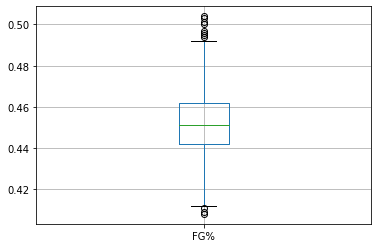

In [11]:
print(data.boxplot(['FG%']))

# outliers seem to be found by itself

But we wanted more visualizations that would be effective for seeing the differences between Playoff and Non-Playoff teams. 

##### For the next several ScatterPlot visualizations, the points labeled - 
<font color='red'>in RED will mean the team DID make the playoffs</font>

<font color='blue'>in BLUE will mean the team did NOT make the playoffs</font>

Here we're comparing Field Goals made to Field Goals attempted. We see a general trend in that with more shots attempted there also seems to be more shots made. Notice the about 80% correlation for this linear relationship. But when examining if there's an indication that more shots made equates to making the playoffs, there seems to be a pretty even spread with great shooting teams at high volumes missing the playoffs and poorly shooting teams making the playoffs. 

There may be many reasons for this, maybe perhaps this is due to the widely talked about 3 point shooting explosion where teams are taking more 3 pointers which leads to more teams taking the less "guaranteed" shot in exchange for more points? Or maybe this is due to the increase in Pace which leads to more shots being taking in general which can lead to a wider variance between the playoff statuses'of the teams that take more shots (Team's shooting is inconsistent night-to-night and thus winning is inconsistent which leads to missing the playoffs)?

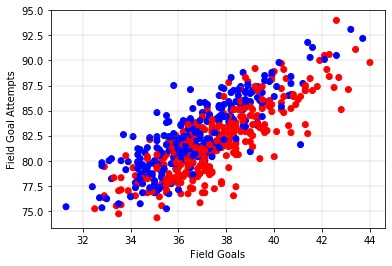

[[1.         0.78872443]
 [0.78872443 1.        ]]


In [70]:
colors = {'Y':'red', 'N':'blue'}
plt.scatter(data['FG'], data['FGA'], c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Field Goals')
plt.ylabel('Field Goal Attempts')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(data['FG'], data['FGA']))

Below we see Field Goals Attempted by year and Field Goal % by year. Pre-2010 we see FGA fluctuate but mainly stay about the same. As you move into the 2010s, the FGAs start to increase but it isn't till around 2017 when the league average for FGA really begins to increase. Infact with the 2019 season, most of the teams FGAs are above the teams from the 2000s. There's no clear pattern for more Field Goals Attempted equating to making the playoffs.

Yet, when you examine the FG%s by year they seem to be fairly steady. What does seem to stick out, is that every year most of the teams that make the playoffs, have higher FG%s relative to their competitors that year. Also shown are the outliers with much greater FG%s compared to their competitors and even those with much lower FG%s compared to those that made the playoffs. An intresting extension would be to track the playoff performances' of the outlier teams from that year, that made the playoffs. 

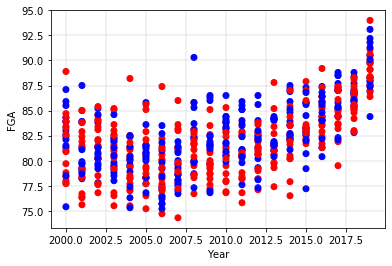

In [81]:
plt.scatter(data['Year'], data['FGA'], c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('FGA')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

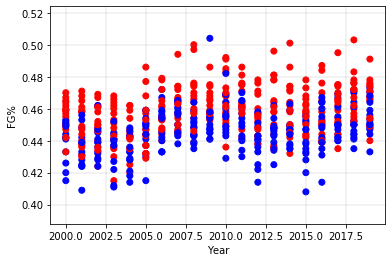

[[1.         0.26275514]
 [0.26275514 1.        ]]


In [74]:
plt.scatter(data['Year'], data['FG%'], c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('FG%')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

While just looking at FGAs and FG%s gave us a good look into the changing NBA landscape, we also wanted to examine the changes in shot selection as the years have gone by. Looking at 2-point attempts, it is quite clear that those have fallen but more drastically in the past couple of years. What is surprising is that many teams with a high number of 2PAs didn't seem to make the playoffs, and infact most teams that made the playoffs took either around the league average of attempts or less. This seems to be true even when 3-pointers weren't as popular (Pre-2010). 

Surprisingly, the percentage for 2-pointers has increased in the same manner as 2PAs have fallen. It makes sense that as teams begin to rely less on the 2-pointer, they are much choosier in the 2-pointers they attempt. In other words, taking layups or stepping back 3 feet for a 3-pointer instead of attempting a contested 2-pointer twenty feet from the basket, which tends to be a shot with a higher degree of difficulty. 

We again see the same pattern of playoff teams making up most of the cluster of the higher shooting% teams.

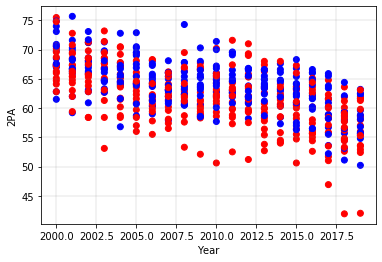

In [79]:
plt.scatter(data['Year'], data['2PA'], c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('2PA')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

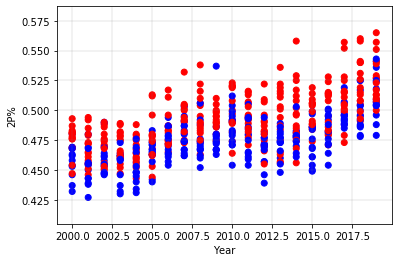

In [80]:
plt.scatter(data['Year'], data['2P%'], c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('2P%')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

Now when examining 3-point attempts by year, we see what most of us expected. That the amount of 3-pointers attempted has slowly increased over time and drastically increased over the past couple of seasons. With the outliers in 3PAs having slowly increased the gap between them and everyone else over time too. As you can see there are plently of teams that took many 3s that didn't make the playoff, many of which (Pre-2010) lead the league in 3PAs.

When examining 3P%, for the most part holds true over time much like FG%. Like the rest of the shooting percentage analysis we see the better shooting percentage teams making the playoffs with some outliers sprinkled in. 

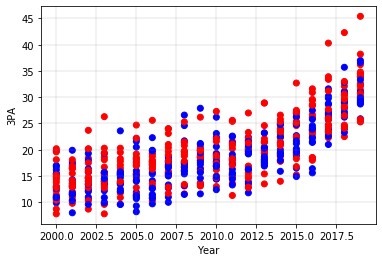

[[1.         0.75263937]
 [0.75263937 1.        ]]


In [58]:
plt.scatter(data['Year'], data['3PA'], c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('3PA')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

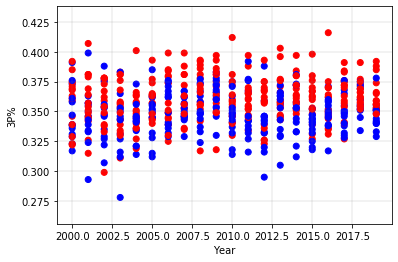

[[1.         0.08738707]
 [0.08738707 1.        ]]


In [59]:
plt.scatter(data['Year'], data['3P%'], c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('3P%')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

##### So does this mean that simply taking a bunch of shots will help your team make the playoffs? Not necessarily. 

Attempting a large number of shots doesn't seem to equate making the playoffs, this is more true when examining 2PAs but much less true when examining 3PAs (more blue with more 2PAs, more red with more 3PAs). The larger point is shooting %. It does seem to equate that the higher your shooting %s are (FG%, 3%, 2%), the more likely you are to make the playoffs. This makes sense as the more consistent you are when scoring, the more often you'll outscore your opponent, which means more wins and a higher likelihood to make the playoffs. 

##### So all a team needs to do is shoot at a high percentage? Yes and no. 
Obviously, scoring is just one faucet of the game. Among playing effective defense, rebounding, avoiding foul trouble, a team must do other things to win games. But when it comes to maximizing offensive output at a consistent rate, according to these visualizations; It's suggested that a team should strike a balance between 2PAs and 3PAs while focusing on the percentage of these attempts. For example, if your team begins to miss an excessive amount of threes during the game (falling below 35%ish), perhaps a shift in strategy towards 2PAs might do some good? Of course this is quite a simple understanding and isn't meant to be a hard and fast rule but many teams get stuck in throwing up excessive amounts of 3s even when they aren't successfully converting them to made baskets.    

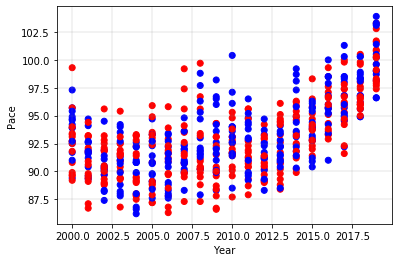

In [78]:
plt.scatter(data['Year'], data['Pace'], c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('Pace')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

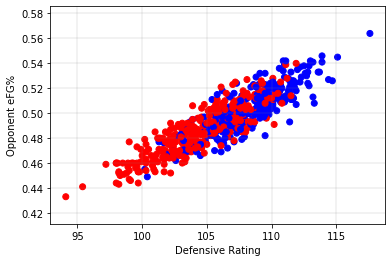

[[1.         0.88871577]
 [0.88871577 1.        ]]


In [62]:
plt.scatter(data['DRtg'], data['OeFG%'],c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Defensive Rating')
plt.ylabel('Opponent eFG%')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(data['DRtg'], data['OeFG%']))

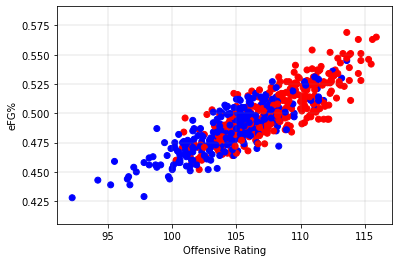

[[1.         0.85215477]
 [0.85215477 1.        ]]


In [63]:
plt.scatter(data['Ortg'], data['eFG%'],c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Offensive Rating')
plt.ylabel('eFG%')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(data['Ortg'], data['eFG%']))

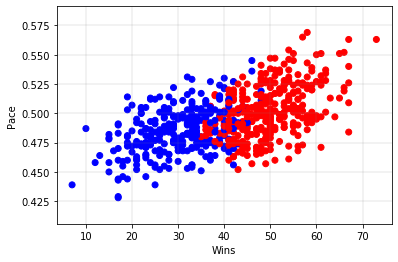

[[1.         0.54377114]
 [0.54377114 1.        ]]


In [65]:
plt.scatter(data['Win'], data['eFG%'],c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Wins')
plt.ylabel('Pace')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(data['Win'], data['eFG%']))

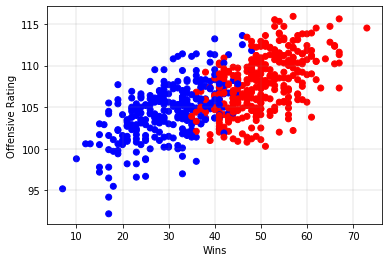

[[1.         0.66051342]
 [0.66051342 1.        ]]


In [68]:
plt.scatter(data['Win'], data['Ortg'],c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Wins')
plt.ylabel('Offensive Rating')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(data['Win'], data['Ortg']))

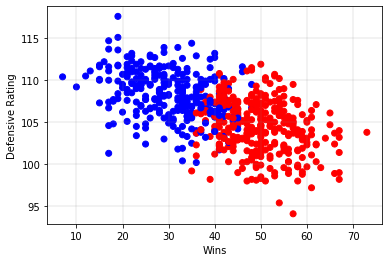

[[ 1.         -0.58108729]
 [-0.58108729  1.        ]]


In [69]:
plt.scatter(data['Win'], data['DRtg'],c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Wins')
plt.ylabel('Defensive Rating')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(data['Win'], data['DRtg']))

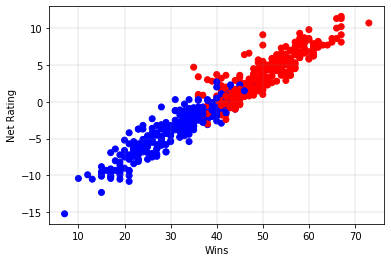

[[1.         0.96063952]
 [0.96063952 1.        ]]


In [64]:
plt.scatter(data['Win'], data['NRtg'],c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Wins')
plt.ylabel('Net Rating')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()
# shows net rating of all teams, for the most part teams with more wins had higher net ratings
# some had higher net ratings and had low amount of wins and it might be

print(np.corrcoef(data['Win'], data['NRtg']))

In [30]:
# Teams with .500 or greater wins (won at least 41 games) that didn't make the playoffs.  
test = (data.Win >= 41) & (data.Playoffs =='N')
test2 = data[test]
test2

,Year,Team,G,Win,Loss,MP,FG,FGA,FG%,3P,...,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%,Playoffs
18,2000,Orlando Magic,82,41,41,240.9,38.6,85.5,0.452,3.6,...,24.0,100.1,102.4,101.7,0.7,97.3,0.516,0.473,0.476,N
38,2001,Houston Rockets,82,45,37,241.8,35.9,79.2,0.453,6.1,...,20.2,97.2,106.7,104.2,2.5,90.4,0.538,0.492,0.475,N
53,2001,Seattle SuperSonics,82,44,38,241.5,36.9,81.1,0.456,5.7,...,21.1,97.3,105.6,105.6,0.0,91.6,0.530,0.491,0.488,N
73,2002,Milwaukee Bucks,82,41,41,242.7,37.1,80.2,0.462,7.2,...,21.8,97.5,106.9,107.1,-0.2,90.2,0.544,0.507,0.477,N
95,2003,Houston Rockets,82,43,39,243.0,34.6,78.8,0.440,5.4,...,19.5,93.8,104.3,102.6,1.7,88.8,0.522,0.474,0.462,N
138,2004,Portland Trail Blazers,82,41,41,243.7,35.3,78.9,0.448,4.6,...,19.0,90.7,103.7,105.1,-1.4,86.2,0.515,0.478,0.482,N
143,2004,Utah Jazz,82,42,40,241.2,32.8,75.3,0.436,3.1,...,25.6,88.7,101.9,103.3,-1.4,86.6,0.509,0.456,0.468,N
149,2005,Cleveland Cavaliers,82,42,40,242.1,36.5,81.5,0.447,3.7,...,22.6,96.5,106.6,105.7,0.9,89.7,0.518,0.470,0.485,N
161,2005,Minnesota Timberwolves,82,44,38,240.9,37.1,80.8,0.459,4.8,...,21.6,96.8,108.2,106.6,1.6,89.1,0.534,0.489,0.472,N
203,2006,Utah Jazz,82,41,41,242.4,33.5,75.7,0.442,3.8,...,24.8,92.4,104.1,107.0,-2.9,87.8,0.519,0.467,0.490,N


In [20]:
playoff = data.loc[data['Playoffs'] == 'Y']
nonplayoff = data.loc[data['Playoffs'] == 'N']

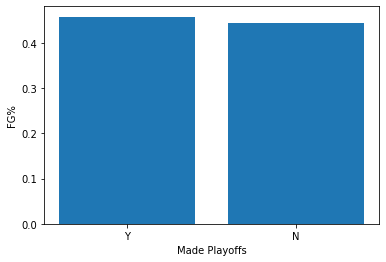

In [21]:
plt.bar(['Y', 'N'], [playoff['FG%'].mean(), nonplayoff['FG%'].mean()])
plt.xlabel('Made Playoffs')
plt.ylabel('FG%')
plt.show()

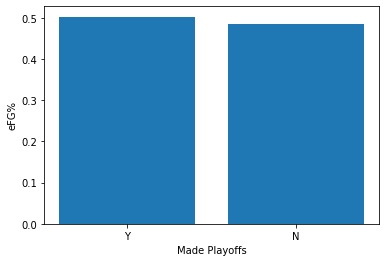

In [22]:
plt.bar(['Y', 'N'], [playoff['eFG%'].mean(), nonplayoff['eFG%'].mean()])
plt.xlabel('Made Playoffs')
plt.ylabel('eFG%')
plt.show()

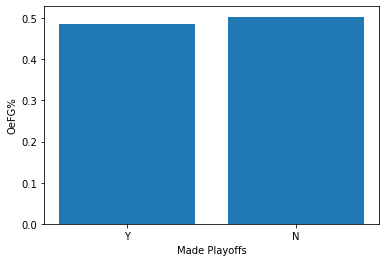

In [23]:
plt.bar(['Y', 'N'], [playoff['OeFG%'].mean(), nonplayoff['OeFG%'].mean()])
plt.xlabel('Made Playoffs')
plt.ylabel('OeFG%')
plt.show()

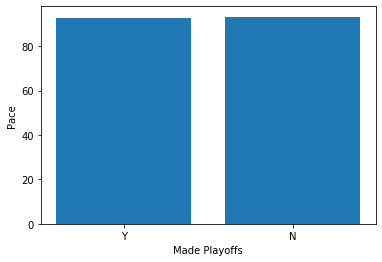

In [24]:
plt.bar(['Y', 'N'], [playoff['Pace'].mean(), nonplayoff['Pace'].mean()])
plt.xlabel('Made Playoffs')
plt.ylabel('Pace')
plt.show()

# pace seems similar for both playoff and nonplayoff teams, however pace seems to be very high

In [26]:
# drop both team names and year as this should be removed to make srue it does not affect the dataset
data = data.drop(['Team', 'Year', 'G', 'Win', 'Loss', 'MP'], axis = 1)

data.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%,Playoffs
0,36.6,83.0,0.441,3.1,9.9,0.317,33.4,73.1,0.458,18.0,...,21.0,94.3,102.0,107.9,-5.9,91.7,0.503,0.460,0.481,N
1,37.2,83.9,0.444,5.1,15.4,0.331,32.2,68.5,0.469,19.8,...,27.1,99.3,104.8,105.6,-0.8,94.6,0.520,0.474,0.498,N
2,35.8,79.7,0.449,4.1,12.2,0.339,31.7,67.5,0.469,22.7,...,20.4,98.4,104.3,101.4,2.9,93.9,0.530,0.475,0.478,Y
3,31.3,75.4,0.415,4.1,12.6,0.329,27.1,62.8,0.432,18.1,...,23.3,84.8,94.2,104.6,-10.4,89.4,0.490,0.443,0.484,N
4,36.3,82.1,0.442,4.2,11.2,0.373,32.1,70.9,0.453,20.2,...,27.1,97.0,100.4,104.0,-3.6,95.7,0.516,0.468,0.474,N


In [27]:
data_y = data['Playoffs']
data_x = data.drop(['Playoffs'], axis = 1)
print(data_y.shape)
print(data_x.shape)

(595,)
(595, 28)


In [28]:
# change Y and N to 1 and 0

data_y.replace('Y', 1, inplace = True)
data_y.replace('N', 0, inplace = True)

data_y.head()


0    0
1    0
2    1
3    0
4    0
Name: Playoffs, dtype: int64

In [29]:
data_x.columns

Index(['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Ortg', 'DRtg', 'NRtg', 'Pace', 'TS%', 'eFG%', 'OeFG%'],
      dtype='object')

In [31]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

params = {'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [5, 10, 15, 20], 'max_features': [4, 6, 8, 10, 12]}

grid_search = GridSearchCV(clf, params, cv = 10, scoring = 'accuracy')

grid_search.fit(data_x, data_y)

print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)

{'max_depth': 12, 'max_features': 12, 'min_samples_leaf': 20}
Accuracy: 90.41242937853107


In [31]:
from sklearn.model_selection import cross_val_score

nested_score = cross_val_score(grid_search, data_x, data_y, cv = 10)

print("Accuracy:", nested_score.mean()*100)

Accuracy: 88.05932203389831


In [32]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

cross_val = cross_val_score(nb, data_x, data_y, cv = 10)

print("Scores:", cross_val)                                            

print("Accuracy:", cross_val.mean()*100)

Scores: [0.81666667 0.81666667 0.8        0.9        0.85       0.83050847
 0.81355932 0.89830508 0.81355932 0.6779661 ]
Accuracy: 82.17231638418079


In [33]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
knn = KNeighborsClassifier()
pca = PCA()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('knn', knn)])

param_grid = {
    'pca__n_components': list(range(1, 28)), #find how many principal componenet to keep
    'knn__n_neighbors': list(range(1, 28)),  #find the best value of k
}

grid_search = GridSearchCV(pipe, param_grid, cv = 5)

grid_search.fit(data_x, data_y)

print(grid_search.best_score_)
print(grid_search.best_params_)

nested_score = cross_val_score(grid_search, data_x, data_y, cv = 5)

print("Accuracy:", nested_score.mean()*100)

0.8470588235294118
{'knn__n_neighbors': 27, 'pca__n_components': 10}
Accuracy: 83.19327731092437


In [34]:
from sklearn.svm import SVC

svc = SVC()

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('svc', svc)])

param_grid = {'svc__C': list(range(10, 110, 10)), 'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(pipe, param_grid, cv = 5)
grid_search.fit(data_x, data_y)
print(grid_search.best_params_)

nested_score = cross_val_score(grid_search, data_x, data_y, cv = 5)

print("Accuracy:", nested_score.mean()*100)

{'svc__C': 50, 'svc__kernel': 'linear'}
Accuracy: 87.22689075630251


In [35]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(max_iter = 500)

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('nn', nn)])
param_grid = {'nn__hidden_layer_sizes': [(50, 50,), (60, 60,), (70, 70,), (80, 80,), (90,90,), (100, 100,)]
              , 'nn__activation': ['logistic', 'tanh', 'relu']}

grid_search = GridSearchCV(pipe, param_grid, cv = 5)
grid_search.fit(data_x, data_y)
print(grid_search.best_params_)

nested_score = cross_val_score(grid_search, data_x, data_y, cv = 5)
print("Accuracy:", nested_score.mean()*100)

{'nn__activation': 'logistic', 'nn__hidden_layer_sizes': (90, 90)}
Accuracy: 87.89915966386556


In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_grid = {'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [5, 10, 15, 20], 'max_features': ['sqrt', 'log2', 'auto']}
grid_search = GridSearchCV(rfc, param_grid, cv = 5)
nested_score = cross_val_score(grid_search, data_x, data_y, cv = 5)
print("Accuracy:", nested_score.mean()*100)

Accuracy: 90.75630252100841


In [37]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier()

param_grid = {'n_estimators': list(range(50, 275, 25))}

grid_search = GridSearchCV(boost, param_grid, cv = 5)
nested_score = cross_val_score(grid_search, data_x, data_y, cv = 5)
print("Accuracy:", nested_score.mean()*100)

Accuracy: 85.54621848739495


In [32]:
import pickle

clf = DecisionTreeClassifier()

params = {'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [5, 10, 15, 20], 'max_features': [4, 6, 8, 10, 12]}

grid_search = GridSearchCV(clf, params, cv = 10, scoring = 'accuracy')

grid_search.fit(data_x, data_y)

final_model = grid_search

filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [33]:
loaded_model = pickle.load(open(filename, 'rb'))

test_data_x = test_data.drop(['Team', 'Year', 'G', 'Win', 'Loss', 'MP', 'Playoffs'], axis = 1)

test_data_x.shape

y_predict = loaded_model.predict(test_data_x)
print(y_predict)

[0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0]


In [34]:
szn_data = test_data
szn_data['Playoffs'] = y_predict
szn_data

,Year,Team,G,Win,Loss,MP,FG,FGA,FG%,3P,...,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%,Playoffs
595,2020,Atlanta Hawks,67,20,47,243.0,40.6,90.6,0.449,12.0,...,23.1,111.8,107.2,114.8,-7.6,103.0,0.554,0.515,0.543,0
596,2020,Boston Celtics,64,43,21,242.0,41.2,89.6,0.459,12.4,...,21.4,113.0,112.9,106.8,6.1,99.3,0.567,0.529,0.510,1
597,2020,Brooklyn Nets,64,30,34,243.1,40.0,90.0,0.444,12.9,...,20.7,110.8,108.1,108.7,-0.6,101.2,0.550,0.515,0.507,0
598,2020,Charlotte Hornets,65,23,42,242.3,37.3,85.9,0.434,12.1,...,18.8,102.9,106.3,113.3,-7.0,95.8,0.539,0.504,0.546,0
599,2020,Chicago Bulls,65,22,43,241.2,39.6,88.6,0.447,12.2,...,21.8,106.8,106.7,109.8,-3.1,99.7,0.547,0.515,0.546,0
600,2020,Cleveland Cavaliers,65,19,46,241.9,40.3,87.9,0.458,11.2,...,18.3,106.9,107.5,115.4,-7.9,98.7,0.553,0.522,0.560,0
601,2020,Dallas Mavericks,67,40,27,241.5,41.6,90.0,0.462,15.3,...,19.0,116.4,116.7,110.6,6.1,99.1,0.581,0.548,0.519,1
602,2020,Denver Nuggets,65,43,22,242.3,41.8,88.9,0.471,10.9,...,20.0,110.4,112.5,109.5,3.0,97.2,0.564,0.532,0.526,1
603,2020,Detroit Pistons,66,20,46,241.9,39.3,85.7,0.459,12.0,...,19.7,107.2,109.0,112.7,-3.7,97.6,0.561,0.529,0.541,0
604,2020,Golden State Warriors,65,15,50,241.9,38.6,88.2,0.438,10.4,...,20.1,106.3,105.2,113.8,-8.6,100.3,0.540,0.497,0.553,0
